# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

In [4]:
x =  np.linspace(0, 5, 100)

noise =  np.random.standard_normal(100)

---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

In [11]:
def y(x):
    """真の関数"""
    return 3 - 5 * x + x ** 2

### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [12]:
t = np.add(y(x), noise)


matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

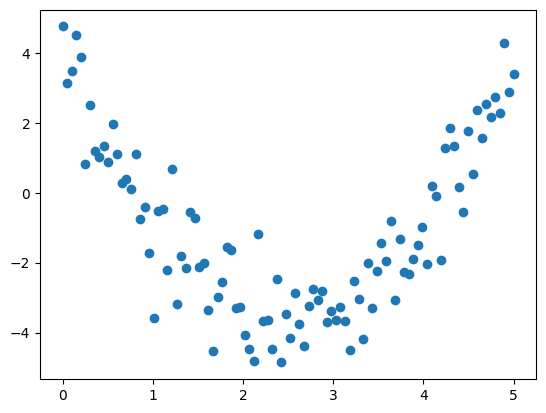

In [13]:
plt.scatter(x, t)

### 問3. `ndarray`の結合

以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\end{array}
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

In [14]:
x = np.linspace(0, 5, 100)

x0= np.ones((x.shape[0]))
x1= np.array(x**1)
x2= np.array(x**2)
Z=np.stack([x0,x1,x2],0)
X=Z.T

---

### 問4. 線形代数

観測値 `x, t` をもとに真の関数 `y` を2次関数で回帰しなさい．

任意の2次関数は $y(x) = w_0 + w_1 x + w_2 x^2$ と表すことができます．  
なので，パラメータのベクトル $\mathbf{w} = (w_0, w_1, w_2)$ を求めれば良いことになります．

これは以下の正規方程式から求めることができます．

$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{t} $

この式の導出はdev_data勉強会で学びます．

行列の積が多い場合は`np.dot`を使わない方が簡潔に書けます．

In [15]:
w0, w1, w2 = np.linalg.inv(X.T@X)@(X.T*t)
pred_y = w0 + w1 * x + w2 * x ** 2

---

### 結果

先ほどのグラフに真の関数(緑)と回帰曲線(赤)を重ねると以下のようになります．

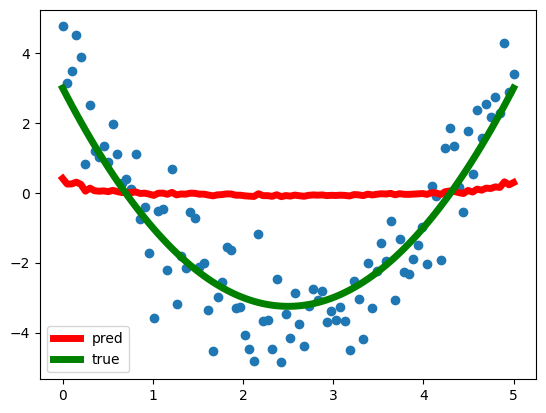

In [16]:
plt.scatter(x, t)
plt.plot(x, pred_y, linewidth=5, color="red", label="pred")
plt.plot(x, y(x), linewidth=5, color="green", label="true")
plt.legend()

今回使った手法は 真の関数 `y` の定義を変更するとその他のコードを全く変更しなくても同様に回帰することができます．

例えば以下のように変更したらその関数を回帰します．

```python
def y(x):
    """真の関数"""
    return 5 * np.sin(np.pi * x / 5)
```
dev_data勉強会で詳しくやりますが，この回帰曲線の表現力は2次までです．
カーブが2つ以上の曲線を回帰したい場合は問3の計画行列の列数を　`x3, x4...`　のように増やせば表現力が上がります．